In [112]:
from basic_functions import data_load

# CONTINGENCY TABLE

In [113]:
#Load Datasets
X_train = data_load("data/X_train.csv")
y_train = data_load("data/y_train_clustered.csv")
X_test = data_load("data/X_test.csv")
y_test = data_load("data/y_test_clustered.csv")

Data loaded!
Data loaded!
Data loaded!
Data loaded!


In [114]:
#Delete household-size (not categorical)
X_train = X_train.copy()
X_test = X_test.copy()

# Crosstable Gender

In [115]:
#Pandas Crosstable (EMPLOYMENT STATUS)
import pandas as pd

table = pd.crosstab(X_train["gender"], y_train["income"], normalize="index")
table_rounded = (table*100).round(1)
print(table_rounded)

income  high  highest  lower middle  lowest  middle
gender                                             
0       18.0      7.3          32.5    13.6    28.7
1        7.5      1.7          39.4    33.7    17.7


In [116]:
desired_order = ["lowest", "lower middle", "middle", "high", "highest"]
table_rounded = table_rounded[desired_order]

In [117]:
label_data = data_load("data/df_labels.csv")
labels = list(label_data["gender"].dropna().unique())
income_labels = list(table_rounded.columns)

Data loaded!


In [118]:
print(labels)

['male', 'female']


In [119]:
table_rounded.index = labels
print(table_rounded)

income  lowest  lower middle  middle  high  highest
male      13.6          32.5    28.7  18.0      7.3
female    33.7          39.4    17.7   7.5      1.7


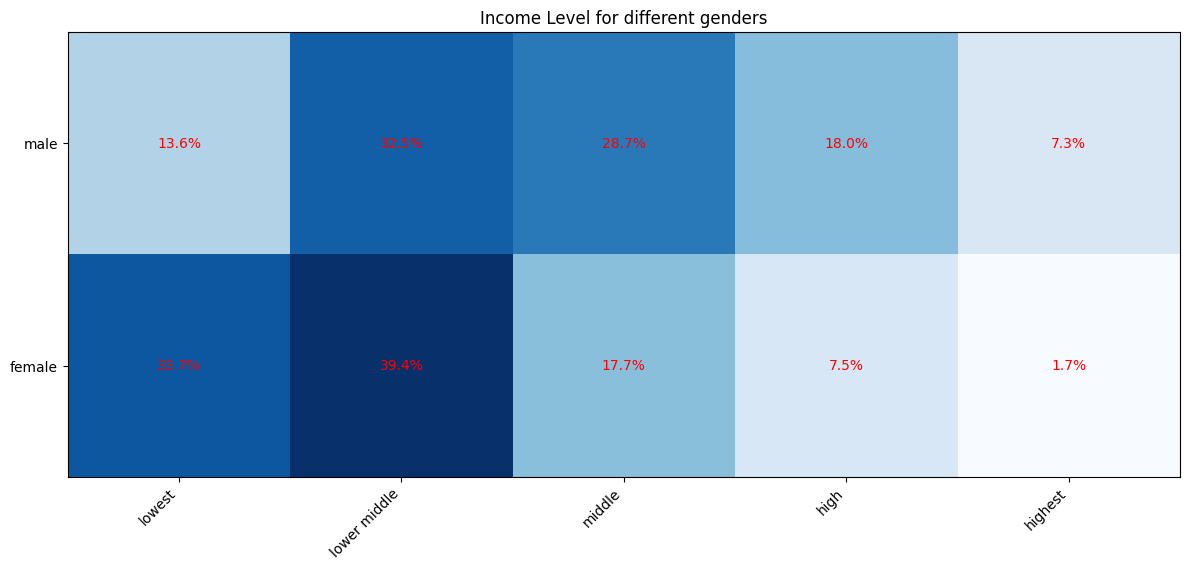

In [128]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(table_rounded.values, cmap="Blues")

# Labels
ax.set_xticks(range(len(income_labels)))
ax.set_xticklabels(income_labels, rotation=45, ha="right")
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)

# Textannotation mit numerischem Zugriff
for i, row_label in enumerate(labels):
    for j, col_label in enumerate(income_labels):
        value = table_rounded.loc[row_label, col_label]
        ax.text(j, i, f"{value}%", ha="center", va="center", color="r")

ax.set_title("Income Level for different genders")
fig.tight_layout()
plt.show()


# Crosstable Federal State

In [138]:
#Pandas Crosstable (EMPLOYMENT STATUS)
import pandas as pd

table = pd.crosstab(X_train["federal_state"], y_train["income"], normalize="index")
table_rounded = (table*100).round(1)
print(table_rounded)

income         high  highest  lower middle  lowest  middle
federal_state                                             
0              17.1      6.5          34.2    14.3    27.9
1               7.7      3.0          34.3    37.8    17.2


In [139]:
desired_order = ["lowest", "lower middle", "middle", "high", "highest"]
table_rounded = table_rounded[desired_order]

In [140]:
label_data = data_load("data/df_labels.csv")
labels = ["western", "eastern"]
income_labels = list(table_rounded.columns)

Data loaded!


In [141]:
print(labels)

['western', 'eastern']


In [142]:
table_rounded.index = labels
print(table_rounded)

income   lowest  lower middle  middle  high  highest
western    14.3          34.2    27.9  17.1      6.5
eastern    37.8          34.3    17.2   7.7      3.0


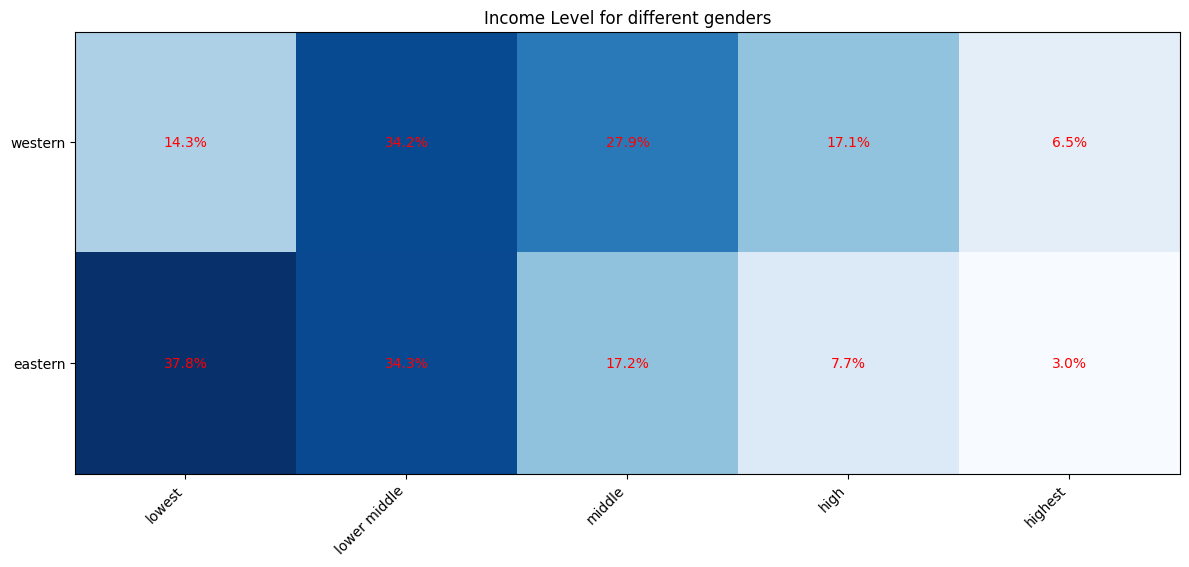

In [143]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(table_rounded.values, cmap="Blues")

# Labels
ax.set_xticks(range(len(income_labels)))
ax.set_xticklabels(income_labels, rotation=45, ha="right")
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)

# Textannotation mit numerischem Zugriff
for i, row_label in enumerate(labels):
    for j, col_label in enumerate(income_labels):
        value = table_rounded.loc[row_label, col_label]
        ax.text(j, i, f"{value}%", ha="center", va="center", color="r")

ax.set_title("Income Level for different genders")
fig.tight_layout()
plt.show()


# CHI²-TEST

In [121]:
from sklearn.feature_selection import chi2
chi2_scores, p_values = chi2(X_train, y_train)
chi2_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Chi2 Score": chi2_scores.round(2),
    "p-value": p_values.round(3)
}).sort_values(by="Chi2 Score", ascending=False)
print(chi2_df)

                      Feature  Chi2 Score  p-value
6                         job    38144.87     0.00
8                  livelihood     4476.60     0.00
10     highest_qualification      1305.22     0.00
9   educational_qualification      599.30     0.00
1                      gender      592.04     0.00
0               federal_state      545.83     0.00
7         employment_position      435.50     0.00
12     Household relationship      368.51     0.00
5           employment_sector      211.19     0.00
2                 citizenship       67.96     0.00
11          primary_residence       55.50     0.00
4           employment_status       46.53     0.00
3              marital_status        3.11     0.54


# CATEGORICAL NAIVE BAYESIAN

In [122]:
from sklearn.naive_bayes import CategoricalNB


clf = CategoricalNB()
clf.fit(X_train, y_train["income"])

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None
,min_categories,None


In [123]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Genauigkeit (Accuracy): {accuracy:.2f}")

# Classification Report: Precision, Recall, F1-Score
print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred))

Genauigkeit (Accuracy): 0.51
Klassifikationsbericht:
              precision    recall  f1-score   support

        high       0.40      0.54      0.46       650
     highest       0.42      0.42      0.42       240
lower middle       0.53      0.65      0.58      1530
      lowest       0.66      0.52      0.58       852
      middle       0.49      0.32      0.39      1175

    accuracy                           0.51      4447
   macro avg       0.50      0.49      0.49      4447
weighted avg       0.52      0.51      0.50      4447



In [124]:
import numpy as np

# Bayesian Prob: P(Federal_State (west, east) | income )

In [125]:
features = X_train.columns

probs = np.exp(clf.feature_log_prob_[0])

income_classes = clf.classes_
prob_df ={}

for i, label  in enumerate(income_classes):
    prob_df[label] = probs[i]

df = pd.DataFrame(prob_df)
print(df)


       high  highest  lower middle    lowest    middle
0  0.902331  0.89769      0.806297  0.611367  0.871413
1  0.097669  0.10231      0.193703  0.388633  0.128587


In [126]:
west, east = X_train["federal_state"].value_counts(normalize=True)
lower_middle, middle, lowest, high, highest = (y_train["income"].value_counts(normalize=True))

In [127]:
p_lowestIncome_west = (df["lowest"][0] * lowest) / west
print(p_lowestIncome_west)

0.14248922061223368
